# Relational Database in Python using SQLite
This notebook demonstrates how to create a relational database from a CSV file using SQLite in Python, insert records into a table with `iterrows`, perform SQL queries, and generate a data visualization based on query results.

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('nutrition_data.db')
cursor = conn.cursor()

In [3]:
df = pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System_20250213.csv')
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q044,VALUE,2,Sex,Female,SEX,FEMALE
3,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Age (years),35 - 44,AGEYR,AGEYR3544
4,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525


In [4]:
# Create the table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS NutritionData (
        State TEXT,
        Year INTEGER,
        Category TEXT,
        Data_Value REAL
    )
''')

# Insert rows using iterrows
for index, row in df.iterrows():
    if pd.notnull(row['Data_Value']):
        cursor.execute('''
            INSERT INTO NutritionData (State, Year, Category, Data_Value)
            VALUES (?, ?, ?, ?)
        ''', (row['LocationDesc'], row['YearStart'], row['Class'], row['Data_Value']))
conn.commit()

In [5]:
# Query average obesity rate by state
query = '''
    SELECT State, AVG(Data_Value) AS Avg_Obesity
    FROM NutritionData
    WHERE Category = 'Obesity'
    GROUP BY State
    ORDER BY Avg_Obesity DESC
    LIMIT 10
'''
top_states = pd.read_sql(query, conn)
top_states

,State,Avg_Obesity


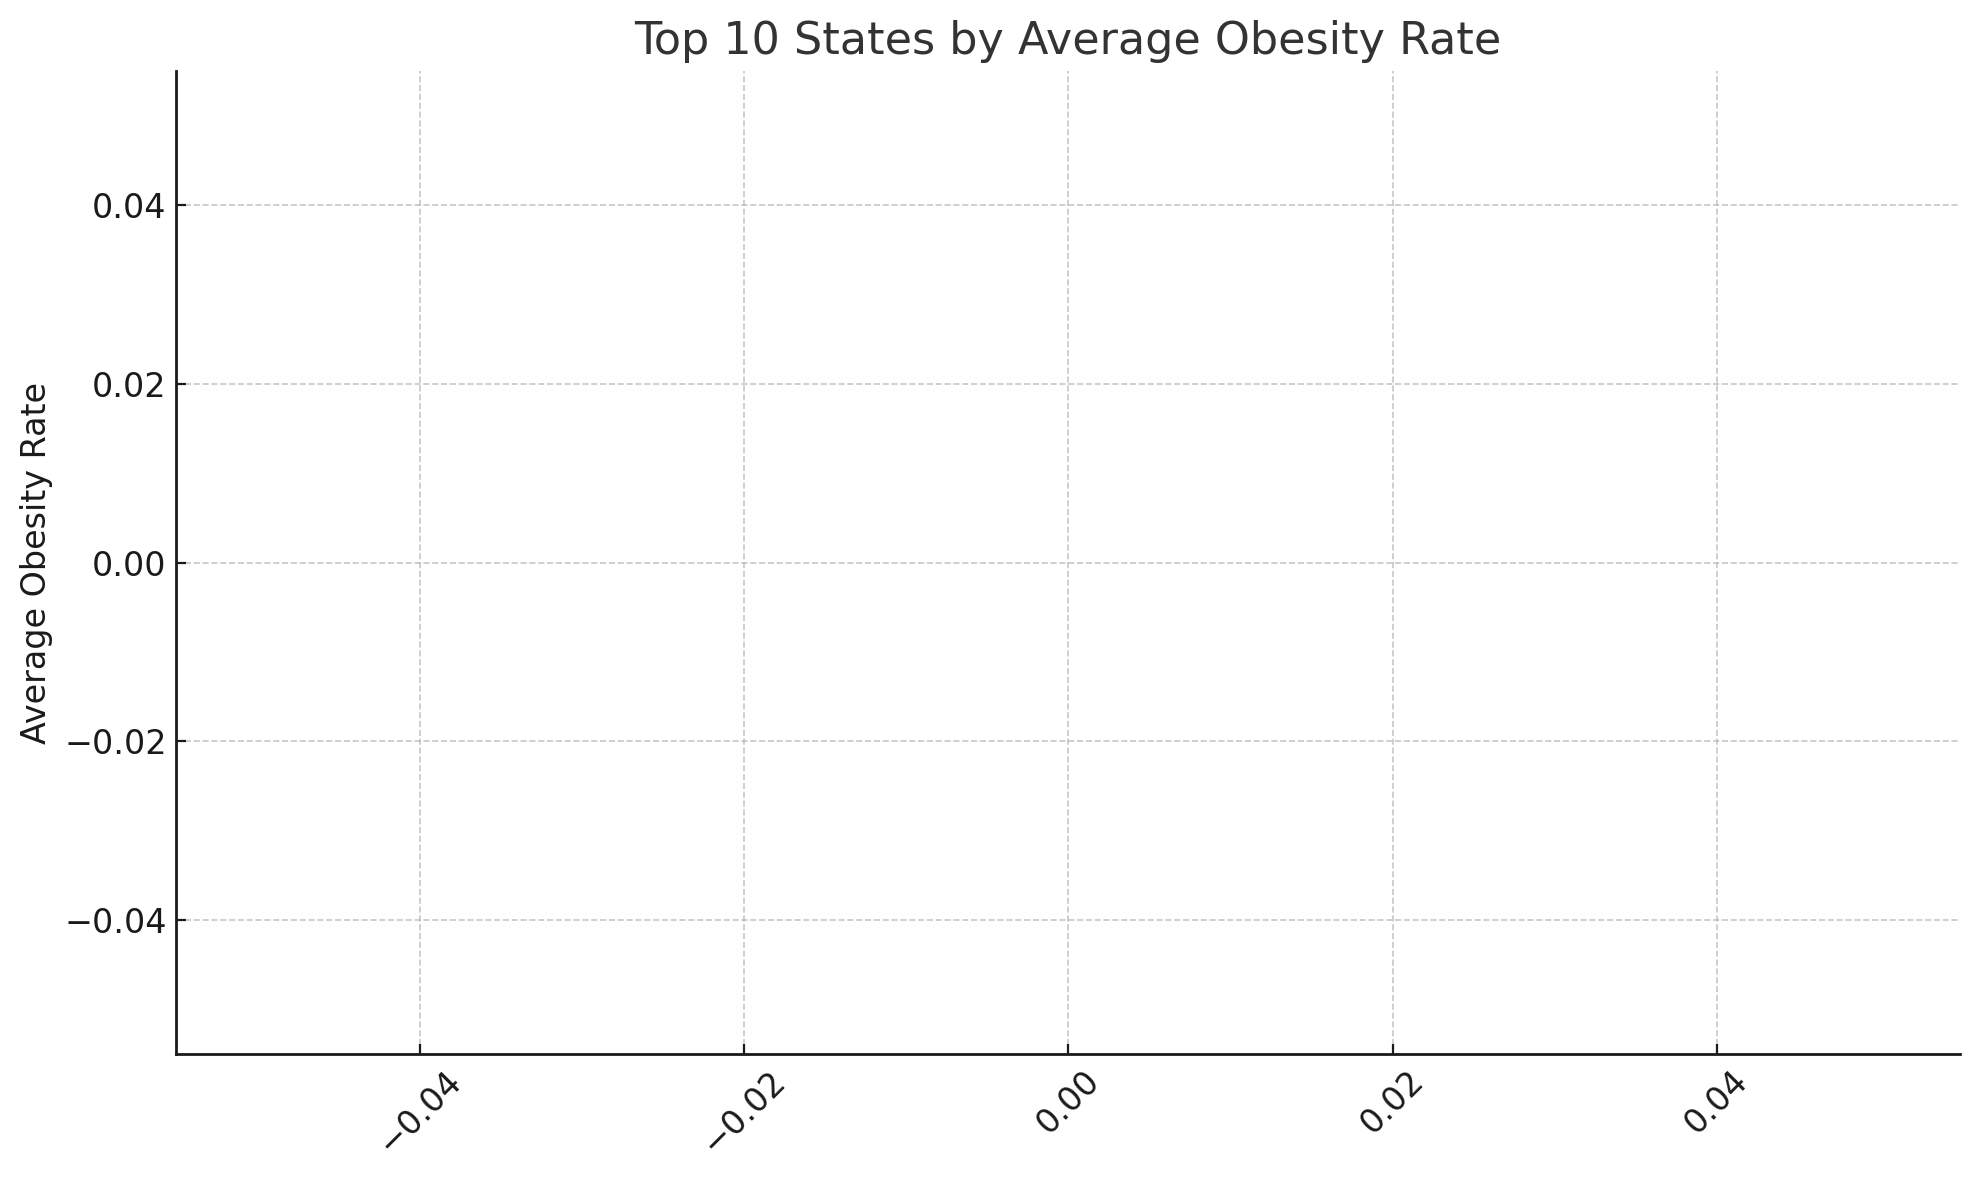

In [6]:
# Bar chart of top 10 states by average obesity rate
plt.figure(figsize=(10,6))
plt.bar(top_states['State'], top_states['Avg_Obesity'])
plt.xticks(rotation=45)
plt.title('Top 10 States by Average Obesity Rate')
plt.ylabel('Average Obesity Rate')
plt.tight_layout()
plt.show()

In [7]:
conn.close()